### Model Evaluation
### Splitting data into testing and training
### Cross-validation (in case of lack of data for testing)
### Over-fitting, Under-fitting and Model Selection


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv')


In [3]:
df.to_csv('module_5_auto.csv')

## First: only using numeric data

In [4]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Libraries for plotting

In [5]:
%%capture
! pip install ipywidgets

In [6]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\alimojadam\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Functions for plotting

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### When testing a model, an important step is splitting the data into training and testing

In [9]:
y_data = df['price']

### dropping target variable from data

In [10]:
x_data = df.drop('price', axis=1)

### Now, I randomly split my data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print('number of test samples :', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [12]:
# 40% split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)

print('number of test samples :', x_test_1.shape[0])
print('number of training samples:', x_train_1.shape[0])

number of test samples : 81
number of training samples: 120


### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

# creating a linear regression object
lre = LinearRegression()

In [14]:
# Fitting the model using the independent variable: 'horsepower'

lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Let's calcuate the R^2 on the test data

In [15]:
lre.score(x_test[['horsepower']], y_test)

# R^2 is smaller using the testing data

0.707688374146705

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

# Cross-Validation Score

#### Cross-validation is used when there is not enough testing data.

### Cross validation takes the SAME dataset and divides it into training and testing MULTIPLE times(i.e. 'number of folds' or 'cv' in cross validation). It finally return multiple R-squared's. In other words, R-squared is used for scoring the different validations. 

In [17]:
# Step 1:
from sklearn.model_selection import cross_val_score

# Step 2: importing model object, independent variable, target data, cv
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [18]:
# Calculating the average and std of our estimate

Rcross.mean()

0.522009915042119

In [19]:
Rcross.std()

0.2911839444756029

In [20]:
# Using two fold cross-validation

Rcross1 = cross_val_score(lre, df[['horsepower']], y_data, cv=2)
Rcross1
Rcross1.mean()


0.5166761697127429

# Prediction using cross-validation function in Python

#### You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:



In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting, and Model Selection

#### Sometimes, testing data (i.e. out of sample data) are better measurs of how well the model performs in the real world. One reason is overfitting. 
#### This point is more obvious in Multiple Linear Regression and Polynomial Regression.

In [25]:
# Creating a Multiple Linear Regression

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Prediction using the training data via MLR

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [29]:
# Prediction using the testing data via MLR

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

### Model evaluation through model vizualiation

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### The distribution of the values predicted using the training data and Actual training data

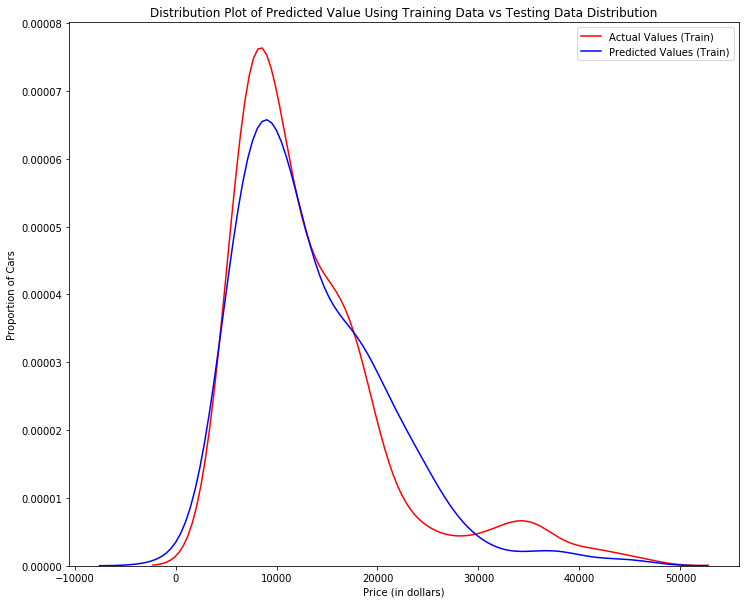

In [32]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Testing Data Distribution'
DistributionPlot(y_train, yhat_train, 'Actual Values (Train)','Predicted Values (Train)', Title)

# y_train: actual values from training data
# yhat_train: predicted values using training data

#### Above, we see that the model learns and predicts well using the training data.

#### The distribution of the values predicted using the testing data and Actual testing data

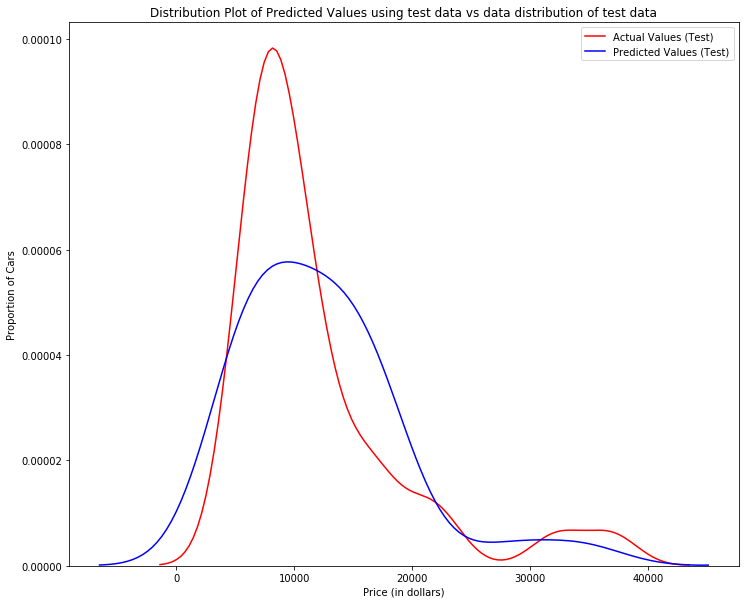

In [34]:
Title = 'Distribution Plot of Predicted Values using test data vs data distribution of test data'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

#### Above, we see that compared to the first graph, there's a huge drop in prediction accuracy of the model.

## Evaluation the prediction accuracy of a Polynomial model

In [37]:
from sklearn.preprocessing import PolynomialFeatures

#### Overfitting occurs when the model fits the noise, not the underlying process that generated the relationship.

In [43]:
# 5th degree polynomial with 45% of data as testing

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)
np.shape(x_train)

(110, 20)

In [44]:
np.shape(x_test)

(91, 20)

In [45]:
# polynomial

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [46]:
# Creating a linear regression model "poly" and training it

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Predicting using the fitted model

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

### comparing the first 5 predicted values and comparing it to the actual targets

In [51]:
print('predicted values:', yhat[0:4])
print('Actual values:', y_test[0:4].values)

predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
Actual values: [ 6295. 10698. 13860. 13499.]


### We will use the function 'PollyPlot' that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

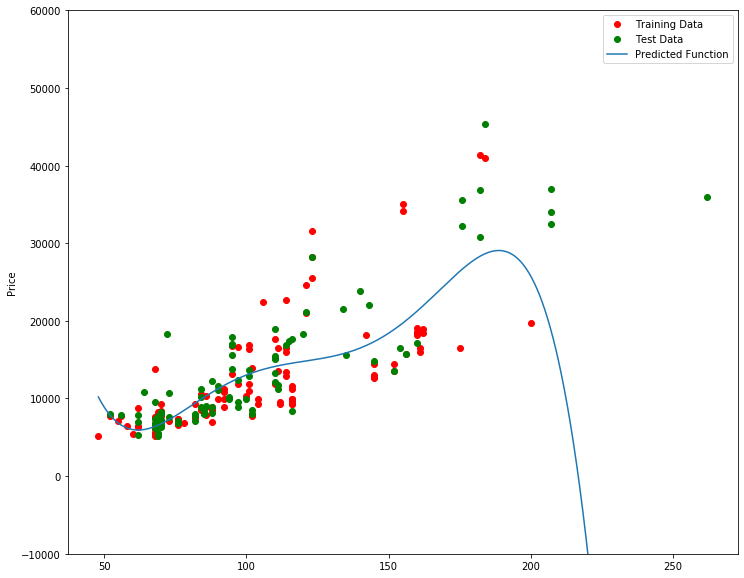

In [52]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

#### Above we see that the polynomial regression model tracks the data well until about horsepower = 200 at which point it dirverges from the data points.

In [54]:
# R-squared of the polynomial model using training data
poly.score(x_train_pr, y_train)

0.5567716899817778

In [55]:
# R-squared of the polynomial model using testing data
poly.score(x_test_pr, y_test)

-29.871838229908324

#### The lower R^2 of the test data is a sign of OVERFITTING.

#### Let's try a different order of the polynomial

Rsqu_test = []

order = [1,2,3,4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
        
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')


#### Above we see that R^2 gradually increases until an order three polynomial and dramatically decreases at four.

In [57]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [58]:
# The following interface allows for experimentation with different polynomial orders and different amounts of data!

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [61]:
# creating a polynomial model

pr1 = PolynomialFeatures(degree=2)

# transforming the training and testing samples for 4 features.

x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [63]:
# the dimensions of the new training dataset

np.shape(x_train_pr1)

(110, 15)

In [66]:
# creating a linear regression model
poly1 = LinearRegression()

In [68]:
# fitting the model using the polynomial features

poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# predicting using the polynomial features

poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
yhat_1 = poly1.predict(x_test_pr1)
yhat_1[0:4]

array([ 6303.02917848, 10402.87148102, 20516.37185593, 19273.87340827])

### plotting the distribution of predicted prices vs actual prices

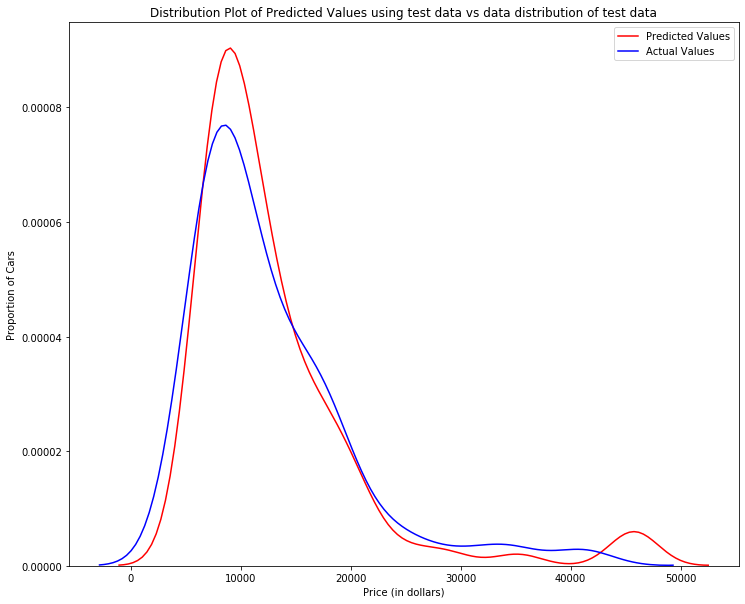

In [82]:
Title = 'Distribution Plot of Predicted Values using test data vs data distribution of test data'
DistributionPlot(yhat_1, y_test, 'Predicted Values', 'Actual Values', Title)

# Ridge Regression

## Here, I will use Alpha to change the model.
# In Ridge Regression, Test Data is used as Validation Data.

In [92]:
# Step 1: Performing a degree 2 polynomial transformation.

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [89]:
# Let's import Ridget from the model Linear Models

In [93]:
from sklearn.linear_model import Ridge

In [96]:
# creating a Ridge Regression object (regularization parameter = 0.1)
RigeModel = Ridge(alpha = 0.1)

# Fitting the model
RigeModel.fit(x_train_pr, y_train)

C:\Users\alimojadam\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
# predicting using the test set
yhat = RigeModel.predict(x_test_pr)

In [99]:
# comparing predicted values vs actual values
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set: [ 6295. 10698. 13860. 13499.]


## We select an Alpha value that minimizes the test error

In [103]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []

ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha = alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

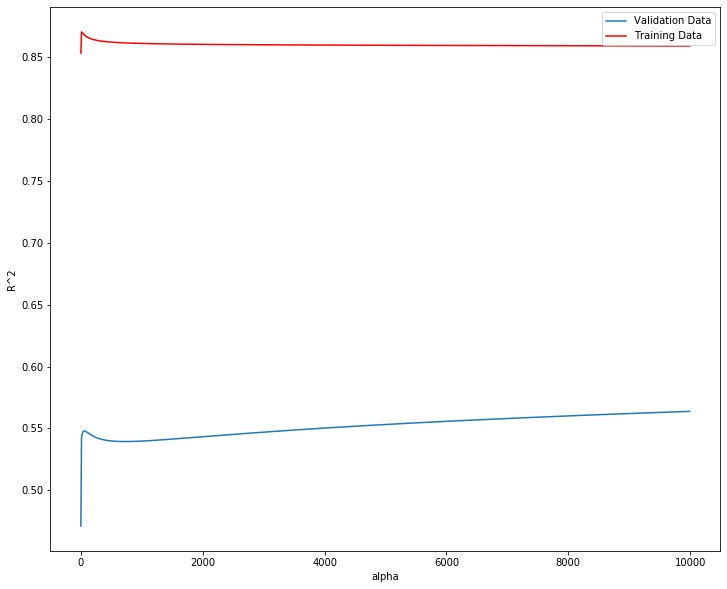

In [104]:
# plotting out the different values of alphas and their corresponding R^2

width = 12
height = 10
plt.figure(figsize = (width, height))

plt.plot(ALFA, Rsqu_test, label = 'Validation Data')
plt.plot(ALFA, Rsqu_train, 'r', label = 'Training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [105]:
# Ridge Regression with Alpha = 10
RigeModel_1 = Ridge(alpha =10)

RigeModel_1.fit(x_train_pr, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [108]:
yhat1 = RigeModel_1.predict(x_test_pr)
yhat1[0:4]

array([ 6472.05406775,  9537.15585237, 21078.08955884, 19750.77444841])

In [109]:
# R^2 for the new Ridge Regression

RigeModel_1.score(x_test_pr, y_test)

0.5418576440207541

# Grid Search

In [112]:
# Finding Alpha in Ridge Regression in a more simple way

#Step 1:
from sklearn.model_selection import GridSearchCV

#Step 2: Dictionary of Alpha values:
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [113]:
# Step 3: Creating a Ridge Object
RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
# Step 4: Creating a Ridge Search Object

Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [116]:
# Step 5: Fit the model

# The Grid1.fit finds the best parameter values on the validation data.

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\alimojadam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
# Obtaining the estimator with the best parameters

BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [118]:
# Step 6: I can now test my model on my test data

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)


0.8411649831036149

In [119]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], 'normalize' : [True, False]}]
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\Users\alimojadam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)